In [1]:
from sciml.model.fno import FNO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')

2025-03-09 01:08:19.162499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-09 01:08:19.172794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741478899.185768  136614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741478899.189218  136614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 01:08:19.203212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
p_1 = 400
p_2 = 400
p_3 = 400
epochs = 30  
index = 10

In [3]:
first_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_1,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_2, activation='relu'),
])

last_network = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(p_2,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(p_3, activation='relu'),
])

I0000 00:00:1741478901.377808  136614 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
folder_path = "data/test_data/example_data_fno/heat2d/"

In [5]:
n_layers = 3
n_modes = p_2 # we use the same number of modes for the network, perfect fourier transform with well known heisenberg inequality (supp )*(supp F) >= n_modes

activation = 'relu'
kernel_initializer = 'he_normal'
device = "GPU"
n_epochs = epochs


In [ ]:
model = FNO(regular_params={"first_network": first_network, "last_network": last_network},fourier_params={"n_layers": n_layers, "n_modes": n_modes, "activation": activation, "kernel_initializer": kernel_initializer}, hyper_params={"p_1": p_1, "p_2": p_2,'p_3':p_3,"device": device,"n_epochs":n_epochs,"index":index})

INFO:sciml.model.fno.fno:Model initialized with 30 epochs, 32 batch size, 0.001 learning rate


In [7]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 8139.93it/s]


Dimensions après extraction du temps 10:
mus: (40, 400)
xs: (40, 400, 2)
sol: (40, 400)


In [8]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 400)
(40, 400, 2)
(40, 400)


In [9]:
train_history = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 14806.47it/s]


Dimensions après extraction du temps 10:
mus: (40, 400)
xs: (40, 400, 2)
sol: (40, 400)


Training progress:   0%|          | 0/30 [00:00<?, ?it/s]

2025-03-09 01:08:23.550621: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 0 completed
Training progress:   3%|▎         | 1/30 [00:00<00:28,  1.03it/s]

2025-03-09 01:08:23.776879: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 1 completed
Training progress:   7%|▋         | 2/30 [00:01<00:14,  1.87it/s]

INFO:sciml.model.fno.fno:Epoch 2 completed
Training progress:  10%|█         | 3/30 [00:01<00:10,  2.53it/s]

2025-03-09 01:08:24.246847: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 3 completed
Training progress:  13%|█▎        | 4/30 [00:01<00:08,  3.00it/s]

INFO:sciml.model.fno.fno:Epoch 4 completed
Training progress:  17%|█▋        | 5/30 [00:01<00:07,  3.34it/s]

INFO:sciml.model.fno.fno:Epoch 5 completed
Training progress:  20%|██        | 6/30 [00:02<00:06,  3.66it/s]

INFO:sciml.model.fno.fno:Epoch 6 completed
Training progress:  23%|██▎       | 7/30 [00:02<00:06,  3.64it/s]

2025-03-09 01:08:25.272114: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 7 completed
Training progress:  27%|██▋       | 8/30 [00:02<00:06,  3.59it/s]

INFO:sciml.model.fno.fno:Epoch 8 completed
Training progress:  30%|███       | 9/30 [00:02<00:05,  3.67it/s]

INFO:sciml.model.fno.fno:Epoch 9 completed
Training progress:  33%|███▎      | 10/30 [00:03<00:05,  3.71it/s]

INFO:sciml.model.fno.fno:Epoch 10 completed
Training progress:  37%|███▋      | 11/30 [00:03<00:05,  3.78it/s]

INFO:sciml.model.fno.fno:Epoch 11 completed
Training progress:  40%|████      | 12/30 [00:03<00:04,  3.88it/s]

INFO:sciml.model.fno.fno:Epoch 12 completed
Training progress:  43%|████▎     | 13/30 [00:03<00:04,  3.88it/s]

INFO:sciml.model.fno.fno:Epoch 13 completed
Training progress:  47%|████▋     | 14/30 [00:04<00:04,  3.91it/s]

INFO:sciml.model.fno.fno:Epoch 14 completed
Training progress:  50%|█████     | 15/30 [00:04<00:03,  3.89it/s]

2025-03-09 01:08:27.324535: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.fno.fno:Epoch 15 completed
Training progress:  53%|█████▎    | 16/30 [00:04<00:03,  3.85it/s]

INFO:sciml.model.fno.fno:Epoch 16 completed
Training progress:  57%|█████▋    | 17/30 [00:04<00:03,  3.90it/s]

INFO:sciml.model.fno.fno:Epoch 17 completed
Training progress:  60%|██████    | 18/30 [00:05<00:03,  3.95it/s]

INFO:sciml.model.fno.fno:Epoch 18 completed
Training progress:  63%|██████▎   | 19/30 [00:05<00:03,  3.66it/s]

INFO:sciml.model.fno.fno:Epoch 19 completed
Training progress:  67%|██████▋   | 20/30 [00:05<00:02,  3.75it/s]

INFO:sciml.model.fno.fno:Epoch 20 completed
Training progress:  70%|███████   | 21/30 [00:06<00:02,  3.72it/s]

INFO:sciml.model.fno.fno:Epoch 21 completed
Training progress:  73%|███████▎  | 22/30 [00:06<00:02,  3.85it/s]

INFO:sciml.model.fno.fno:Epoch 22 completed
Training progress:  77%|███████▋  | 23/30 [00:06<00:01,  4.05it/s]

INFO:sciml.model.fno.fno:Epoch 23 completed
Training progress:  80%|████████  | 24/30 [00:06<00:01,  4.29it/s]

INFO:sciml.model.fno.fno:Epoch 24 completed
Training progress:  83%|████████▎ | 25/30 [00:06<00:01,  4.44it/s]

INFO:sciml.model.fno.fno:Epoch 25 completed
Training progress:  87%|████████▋ | 26/30 [00:07<00:00,  4.57it/s]

INFO:sciml.model.fno.fno:Epoch 26 completed
Training progress:  90%|█████████ | 27/30 [00:07<00:00,  4.63it/s]

INFO:sciml.model.fno.fno:Epoch 27 completed
Training progress:  93%|█████████▎| 28/30 [00:07<00:00,  4.24it/s]

INFO:sciml.model.fno.fno:Epoch 28 completed
Training progress:  97%|█████████▋| 29/30 [00:07<00:00,  4.06it/s]

INFO:sciml.model.fno.fno:Epoch 29 completed
Training progress: 100%|██████████| 30/30 [00:08<00:00,  3.69it/s]


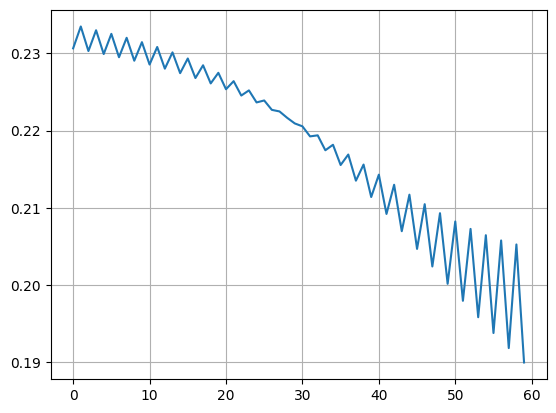

In [10]:
plt.plot(train_history)
plt.grid()
plt.show()